## CHEME 6880 Homework 3 
Net ID : AF626

### Problem 1
Implement the K-means algorithm using any programming language (e.g. MATLAB or Python),
and apply it to the dataset ‘hw4-data-kmeans.xlsx’ which is provided.<br>
(a) Initialize the K-means algorithm with means [1 2] and [-2 -1.5]. Plot the assignment for
each data point, the center location and the objective value in each iteration. How many
iterations are needed for convergence?<br>
(b) Try more clusters (K>2) and different initial mean values in the K-means algorithm, and
show that the performance K-means algorithm is affected by initial choice of solutions.<br>
Note: In this problem, you are expected to develop codes for the clustering algorithm. Your
calculation process should be presented in sufficient details, ideally step-by-step. You could use
any basic calculation/computing tools (e.g. NumPy, MATLAB without toolboxes, etc.) to facilitate
your calculation process. If only the final clustering results are presented without necessary
intermediate steps and results, you will not get most of the credit.

#### Solution

(a) Initialize the K-means algorithm with means [1 2] and [-2 -1.5]. Plot the assignment for
each data point, the center location and the objective value in each iteration. How many
iterations are needed for convergence?<br>

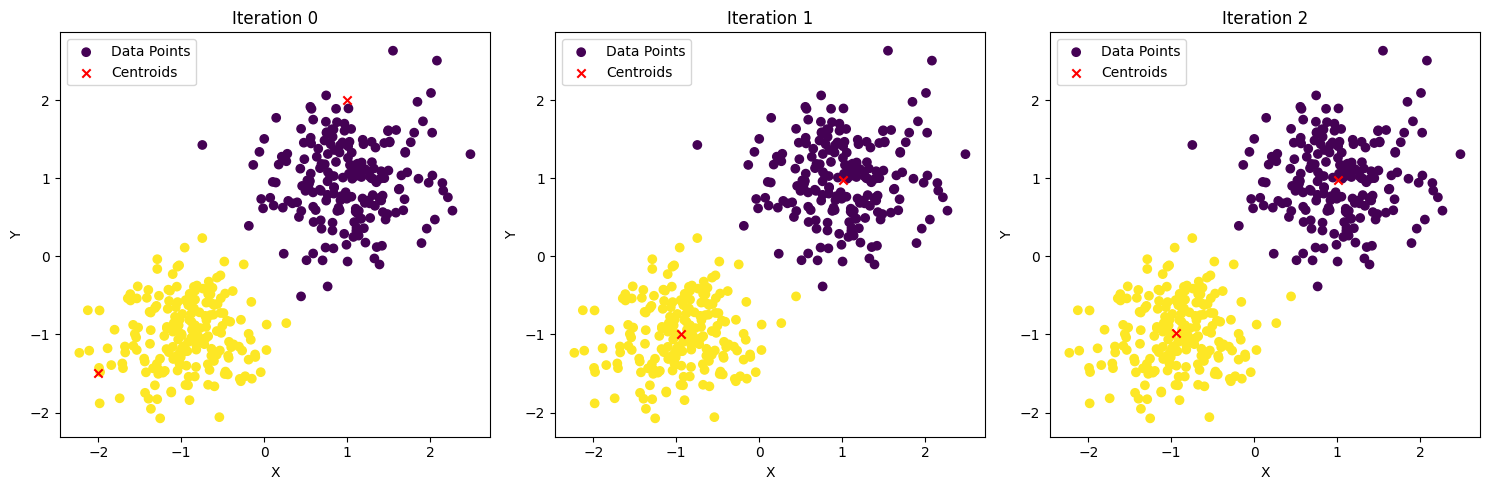

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data from CSV file
data_1 = pd.read_csv('data/hw4-data-kmeans.csv')

# Extracting X and Y coordinates from the DataFrame
data_points = data_1[['x', 'y']].values

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids with provided means
def initialize_centroids(initial_means):
    return np.array(initial_means)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update centroids based on mean of data points in each cluster
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
        else:
            centroids[i] = data[np.random.choice(len(data))]
    return centroids

# Function to perform K-means clustering
def k_means(data, initial_means, k, max_iterations=100):
    centroids = initialize_centroids(initial_means)
    cluster_history = []
    centroid_history = [centroids.copy()]
    for _ in range(max_iterations):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        cluster_history.append(clusters)
        centroid_history.append(centroids.copy())
        if np.all(prev_centroids == centroids):
            break
    return cluster_history, centroid_history

# Performing K-means clustering with K=2 and provided initial means
initial_means = [[1, 2], [-2, -1.5]]
k = 2
cluster_history, centroid_history = k_means(data_points, initial_means, k)

# Ploting all the iterations in a grid
num_iterations = len(cluster_history)  # Corrected number of iterations
num_cols = 3  # Number of columns in the grid
num_rows = (num_iterations + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))  # Set figure size based on number of rows

for i in range(num_iterations):
    clusters = cluster_history[i]
    centroids = centroid_history[i]
    
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
    plt.scatter(data_points[:, 0], data_points[:, 1], c=clusters, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
    plt.title(f'Iteration {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

(b) Try more clusters (K>2) and different initial mean values in the K-means algorithm, and
show that the performance K-means algorithm is affected by initial choice of solutions.

Plotting for Initial Means Set 1


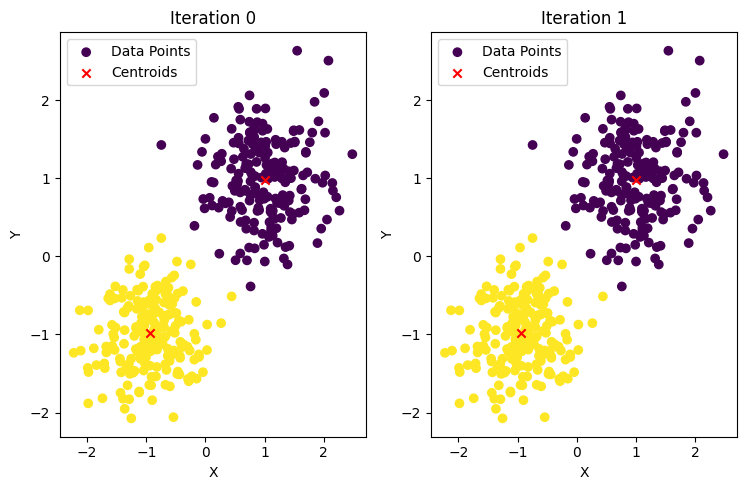

Plotting for Initial Means Set 2


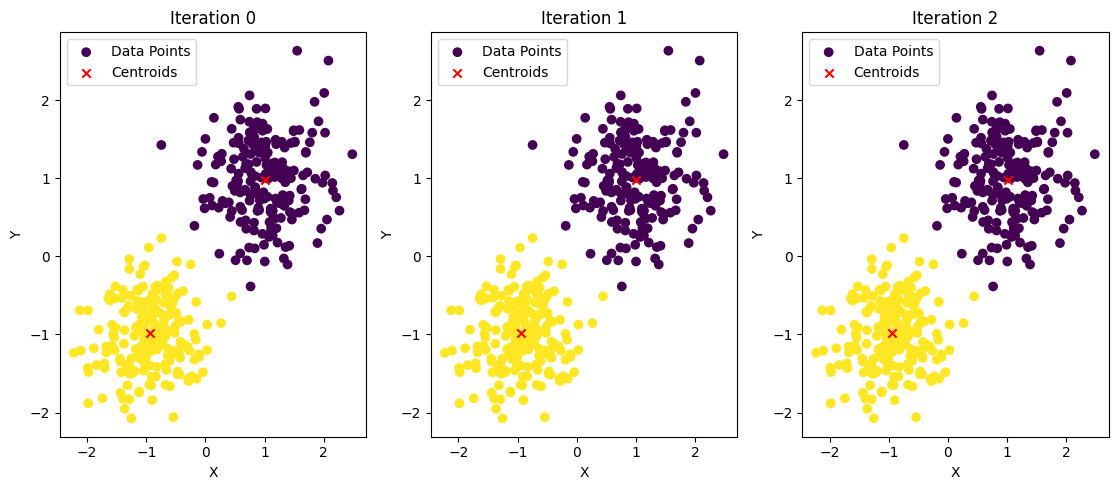

Plotting for Initial Means Set 3


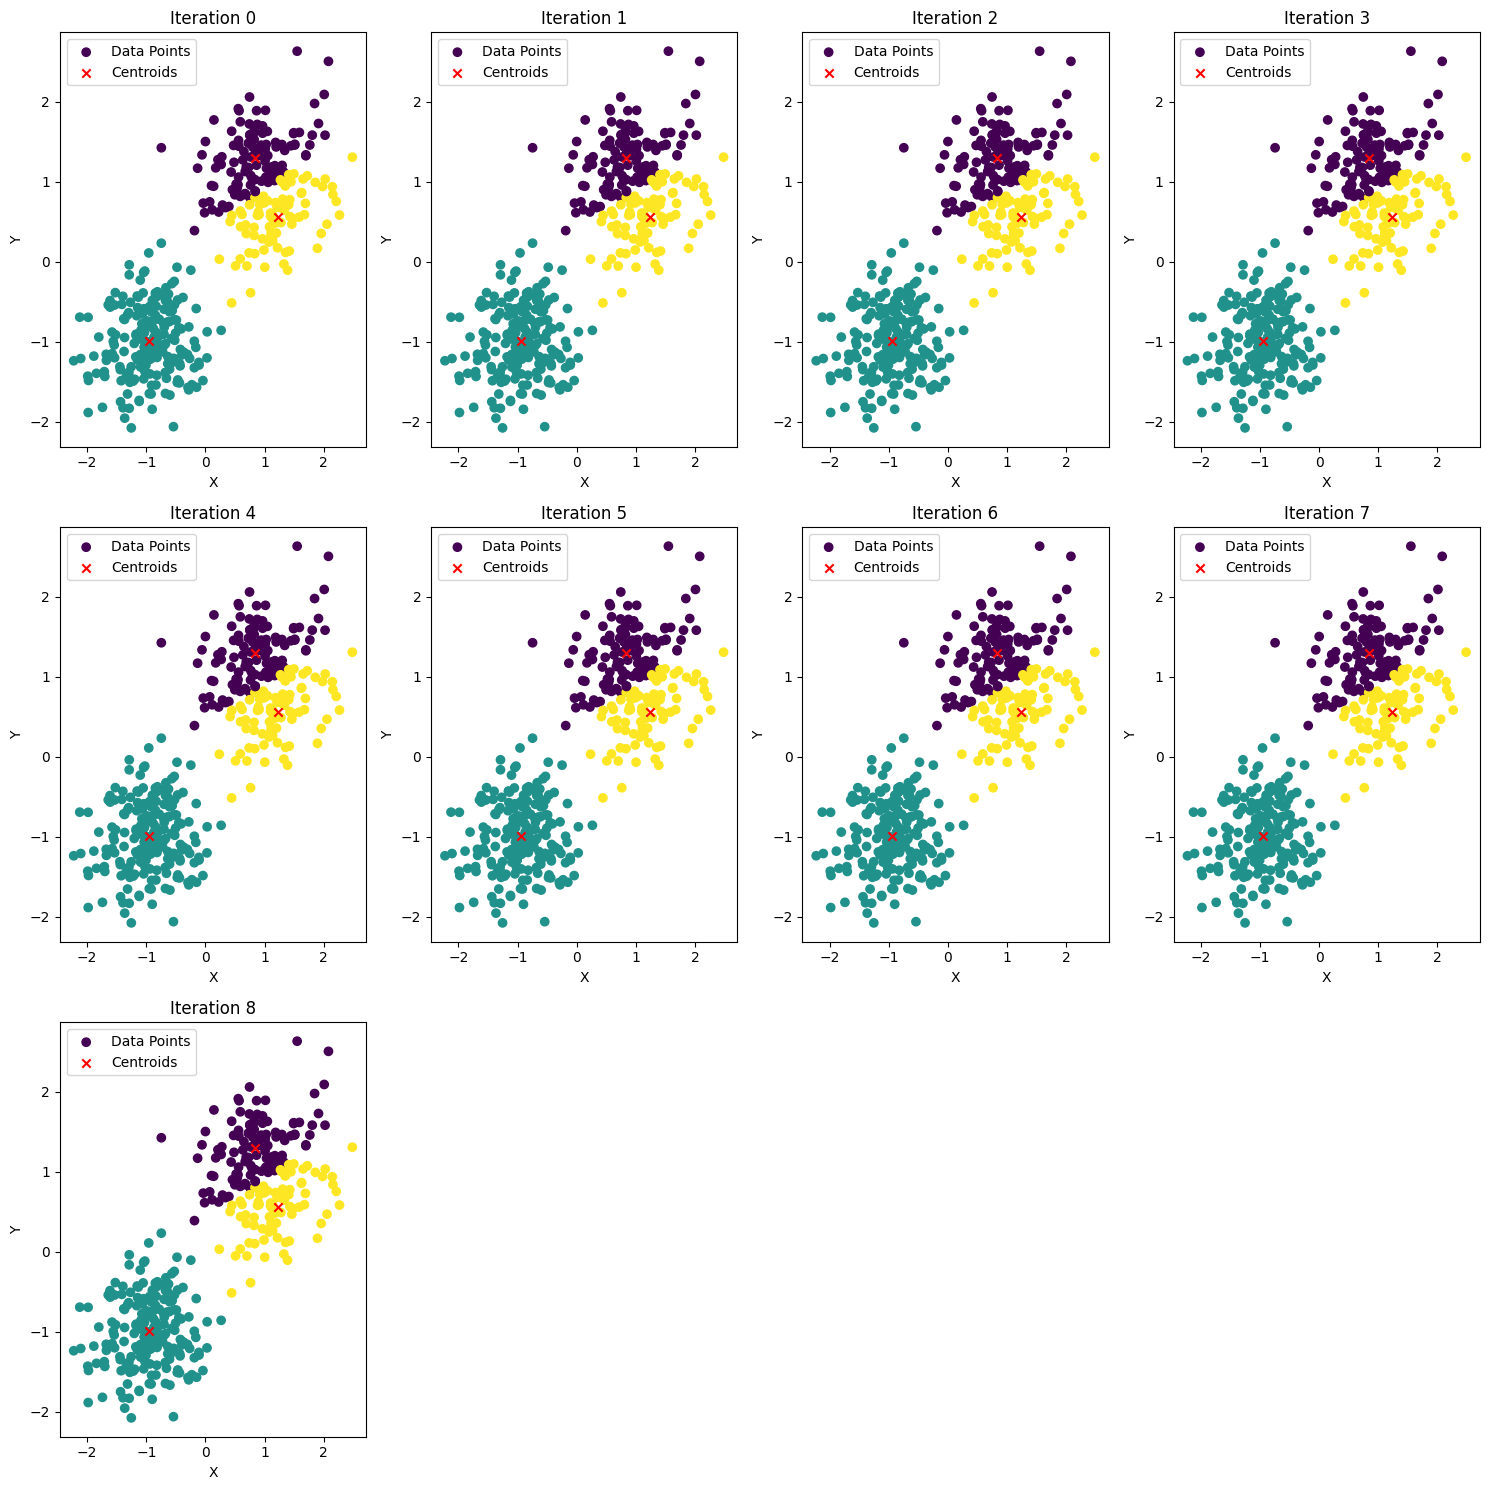

Plotting for Initial Means Set 4


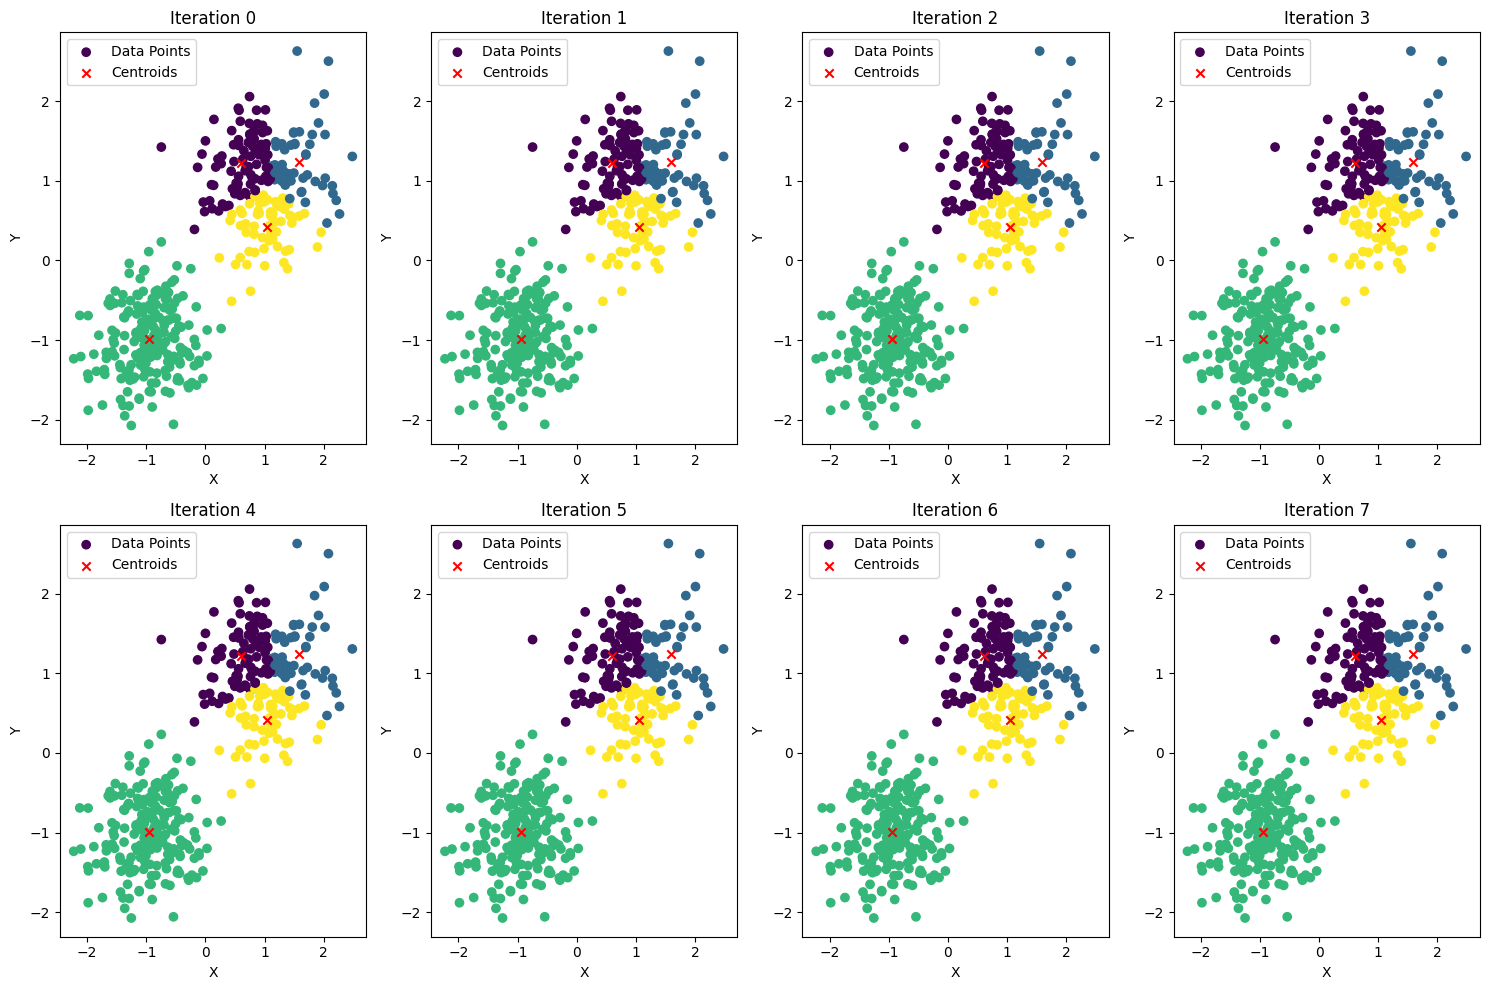

,Number of Clusters,Initial Means,Objective Function,Iterations to Converge
0,2,"[[1, 1], [-1, -1]]",194.264874,2
1,2,"[[1, 2], [-2, -1.5]]",194.264874,3
2,3,"[[2, 2], [-1, -2], [3, -1]]",160.157188,9
3,4,"[[1, 2], [2, 2], [-1, -2], [3, -1]]",133.955486,8


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data from CSV file
data_1 = pd.read_csv('data/hw4-data-kmeans.csv')

# Extract X and Y coordinates from the DataFrame
data_points = data_1[['x', 'y']].values

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids with provided means
def initialize_centroids(initial_means):
    return np.array(initial_means)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update centroids based on mean of data points in each cluster
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
        else:
            centroids[i] = data[np.random.choice(len(data))]
    return centroids

# Function to calculate the objective function value
def calculate_objective_function(data, clusters, centroids):
    obj_function = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        obj_function += np.sum((cluster_points - centroid) ** 2)
    return obj_function

# Function to perform K-means clustering
def k_means(data, initial_means, max_iterations=100):
    k = len(initial_means)
    centroids = initialize_centroids(initial_means)
    cluster_history = []
    centroid_history = [centroids.copy()]
    for _ in range(max_iterations):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        cluster_history.append(clusters.copy())  # Update cluster history
        centroid_history.append(centroids.copy())  # Update centroid history
        if np.all(prev_centroids == centroids):
            break
    objective_function = calculate_objective_function(data, clusters, centroids)
    return clusters, centroids, len(cluster_history), objective_function

# Defining a list of different initial means
initial_means_list = [
    [[1, 1], [-1, -1]], 
    [[1, 2], [-2, -1.5]],
    [[2, 2], [-1, -2], [3, -1]],
    [[1, 2],[2, 2], [-1, -2], [3, -1]]]


# Creating an empty DataFrame to store results
results_list = []

# Iterating over each set of initial means
for idx, initial_means in enumerate(initial_means_list, 1):
    clusters, centroids, iterations, obj_function = k_means(data_points, initial_means)
    
    # Appending results to list
    results_list.append({'Number of Clusters': len(initial_means),
                         'Initial Means': initial_means,
                         'Objective Function': obj_function,
                         'Iterations to Converge': iterations})

    # Plotting code (same as before)
    print(f"Plotting for Initial Means Set {idx}")
    num_iterations = iterations  # Update the number of iterations
    num_cols = 4  # Changed to fit 4 subplots in one row
    num_rows = (num_iterations + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))

    cluster_history = []  # Initialize cluster history list
    centroid_history = []  # Initialize centroid history list
    for _ in range(iterations):
        clusters = assign_clusters(data_points, centroids)
        centroids = update_centroids(data_points, clusters, len(initial_means))
        cluster_history.append(clusters.copy())
        centroid_history.append(centroids.copy())

    for i in range(num_iterations):
        clusters = cluster_history[i]
        centroids = centroid_history[i]

        plt.subplot(num_rows, num_cols, i + 1)
        plt.scatter(data_points[:, 0], data_points[:, 1], c=clusters, cmap='viridis', label='Data Points')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
        plt.title(f'Iteration {i}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Converting the results list to DataFrame
results_df = pd.DataFrame(results_list)
results_df

From the above summary table and plots we can see that when the intial mean is changed the number of iterations needed to converge also changes and also changin K affects the number of iterations as well.<br>
Therefore, the performance of the K Mean Clustering algorithm is affected by the inital mean and the cluster size

### Problem 2
Use a software package to re-solve Problem 1 (clustering). Please use the original data set to cluster
them into four clusters using the following methods:<br>
(a) K-means.<br>
(b) Hierarchical clustering.<br>
(c) Gaussian mixture model.<br>
Please plot the assignment for each data point for all cases.

#### Solution

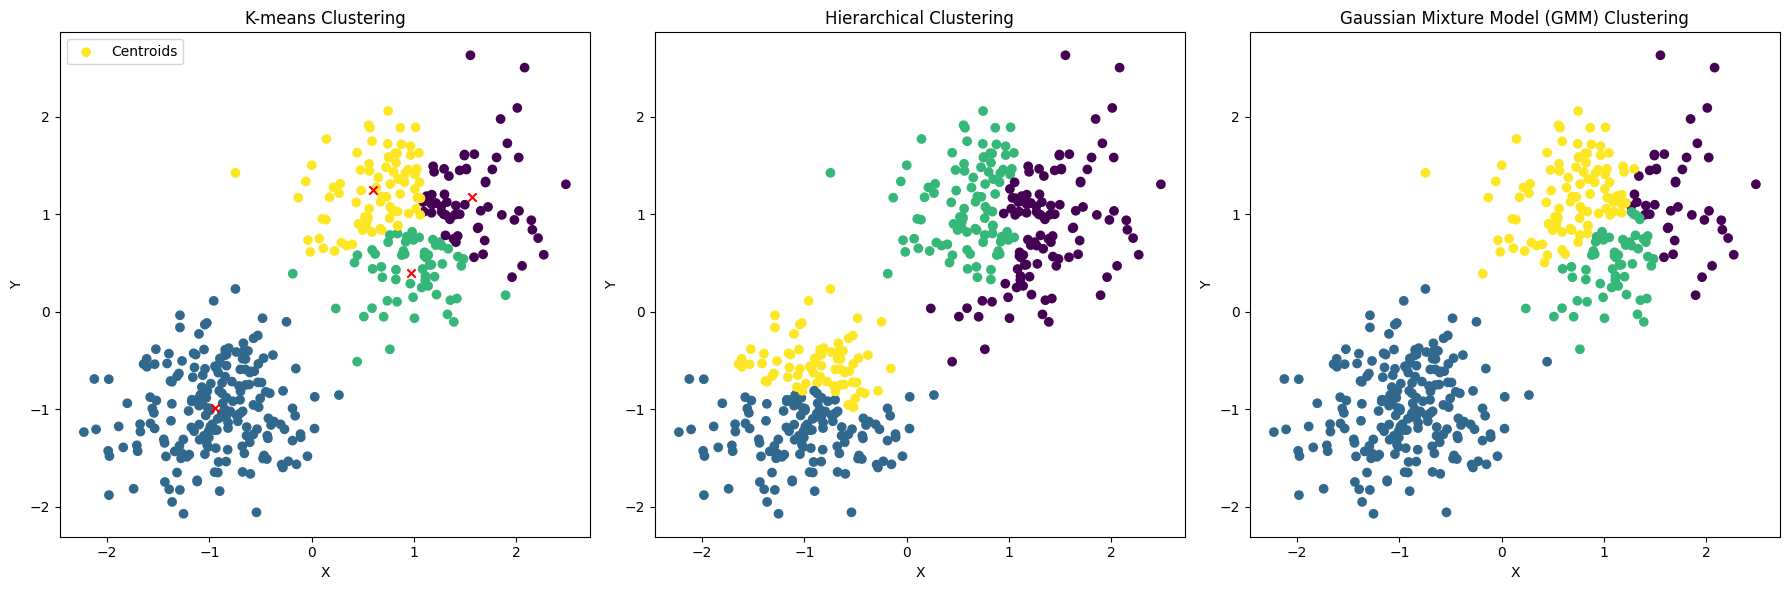

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Reading data from CSV file
data = pd.read_csv('data/hw4-data-kmeans.csv')

# Extracting X and Y coordinates from the DataFrame
data_points = data[['x', 'y']].values

# (a) K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_points)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# (b) Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data_points)

# (c) Gaussian mixture model (GMM) clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(data_points)
gmm_labels = gmm.predict(data_points)

# Plotting all three clustering results as subplots
plt.figure(figsize=(18, 6))

# Plot K-means clustering
plt.subplot(1, 3, 1)
plt.scatter(data_points[:, 0], data_points[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Centroids'])

# Plot Hierarchical clustering
plt.subplot(1, 3, 2)
plt.scatter(data_points[:, 0], data_points[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# Plot Gaussian Mixture Model (GMM) clustering
plt.subplot(1, 3, 3)
plt.scatter(data_points[:, 0], data_points[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

### Problem 3
Use a software package to re-solve Problem 5 in HW#2 (classification via SVM). Please use the
same data set and build a neural network with one hidden layer that has two neurons to predict the
outcome for [1.5 1.5 1.5]. Please report the classification result and also plot the neural network
structure, as well as the values of all parameters in this neural network.

#### Solution

1/1 [==============================] - 0s 34ms/step


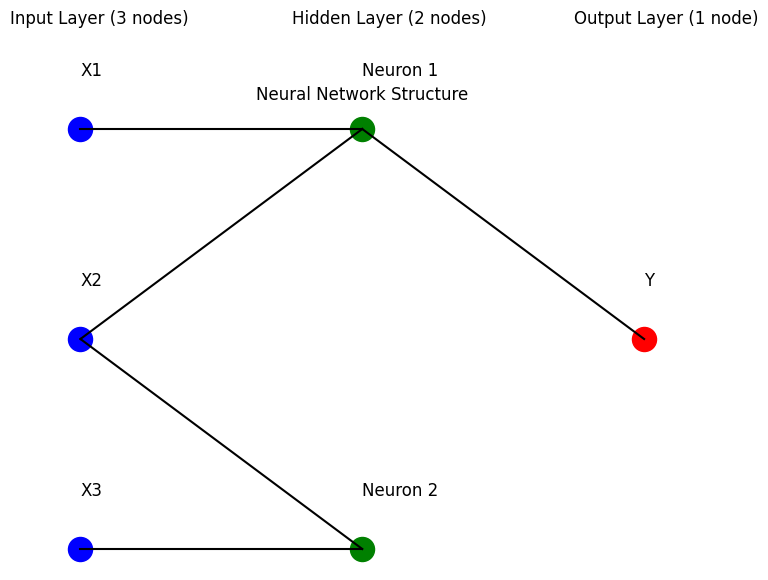

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 8         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Classification Result for [1.5, 1.5, 1.5]: Yes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the data
data = {
    'X1': [1, 1, 1, -1, -1, -1, 1, -1, 2, 2, -2, -2, -2, -2, 2, 2],
    'X2': [1, 1, -1, 1, -1, 1, -1, -1, 2, -2, 2, -2, -2, 2, -2, 2],
    'X3': [1, -1, 1, 1, 1, -1, -1, -1, -2, 2, 2, -2, 2, -2, -2, 2],
    'Y': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
          'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Y' column to binary labels
df['Y'] = df['Y'].map({'Yes': 1, 'No': 0})

# Separate features (X) and target (Y)
X = df[['X1', 'X2', 'X3']]
Y = df['Y']

# Define the neural network architecture
model = Sequential([
    Dense(2, input_dim=3, activation='relu', name='hidden_layer'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=100, batch_size=1, verbose=0)

# Input for prediction
input_data = np.array([[1.5, 1.5, 1.5]])

# Make predictions
prediction = model.predict(input_data)[0][0]
classification_result = 'Yes' if prediction >= 0.5 else 'No'

# Visualize the neural network structure
plt.figure(figsize=(8, 6))

# Input layer
plt.text(0.1, 0.9, 'Input Layer (3 nodes)', fontsize=12)
plt.scatter([0.2, 0.2, 0.2], [0.8, 0.6, 0.4], color='blue', s=300)
plt.text(0.2, 0.85, 'X1', fontsize=12)
plt.text(0.2, 0.65, 'X2', fontsize=12)
plt.text(0.2, 0.45, 'X3', fontsize=12)

# Hidden layer
plt.text(0.5, 0.9, 'Hidden Layer (2 nodes)', fontsize=12)
plt.scatter([0.6, 0.6], [0.8, 0.4], color='green', s=300)
plt.text(0.6, 0.85, 'Neuron 1', fontsize=12)
plt.text(0.6, 0.45, 'Neuron 2', fontsize=12)
plt.plot([0.2, 0.6], [0.8, 0.8], color='black')
plt.plot([0.2, 0.6], [0.6, 0.8], color='black')
plt.plot([0.2, 0.6], [0.4, 0.4], color='black')
plt.plot([0.2, 0.6], [0.6, 0.4], color='black')

# Output layer
plt.text(0.9, 0.9, 'Output Layer (1 node)', fontsize=12)
plt.scatter([1.0], [0.6], color='red', s=300)
plt.text(1.0, 0.65, 'Y', fontsize=12)
plt.plot([0.6, 1.0], [0.8, 0.6], color='black')

plt.axis('off')
plt.title('Neural Network Structure')
plt.show()

# Display the model summary
model.summary()

print("Classification Result for [1.5, 1.5, 1.5]:", classification_result)

### Problem 4
Consider the classification network with the activation functions
Besides, 𝑐𝑐1 = [0, 1], 𝑐𝑐2 = [1, 0] and 𝜎𝜎1 = 𝜎𝜎2 = 1. The output function is given by
𝑓𝑓 = �
+1, if 𝑎𝑎1 − 𝑎𝑎2 − 𝑎𝑎3 ≥ 0
−1, if 𝑎𝑎1 − 𝑎𝑎2 − 𝑎𝑎3 < 0
Please determine the output f under each of the input cases below based on the following
classification network:
(a) 𝑋𝑋 = [𝑥𝑥1, 𝑥𝑥2] = [2, 1]
(b) 𝑋𝑋 = [𝑥𝑥1, 𝑥𝑥2] = [1, 0]
(c) 𝑋𝑋 = [𝑥𝑥1, 𝑥𝑥2] = [3, 2]
(d) 𝑋𝑋 = [𝑥𝑥1, 𝑥𝑥2] = [−1, −1]

#### Solution

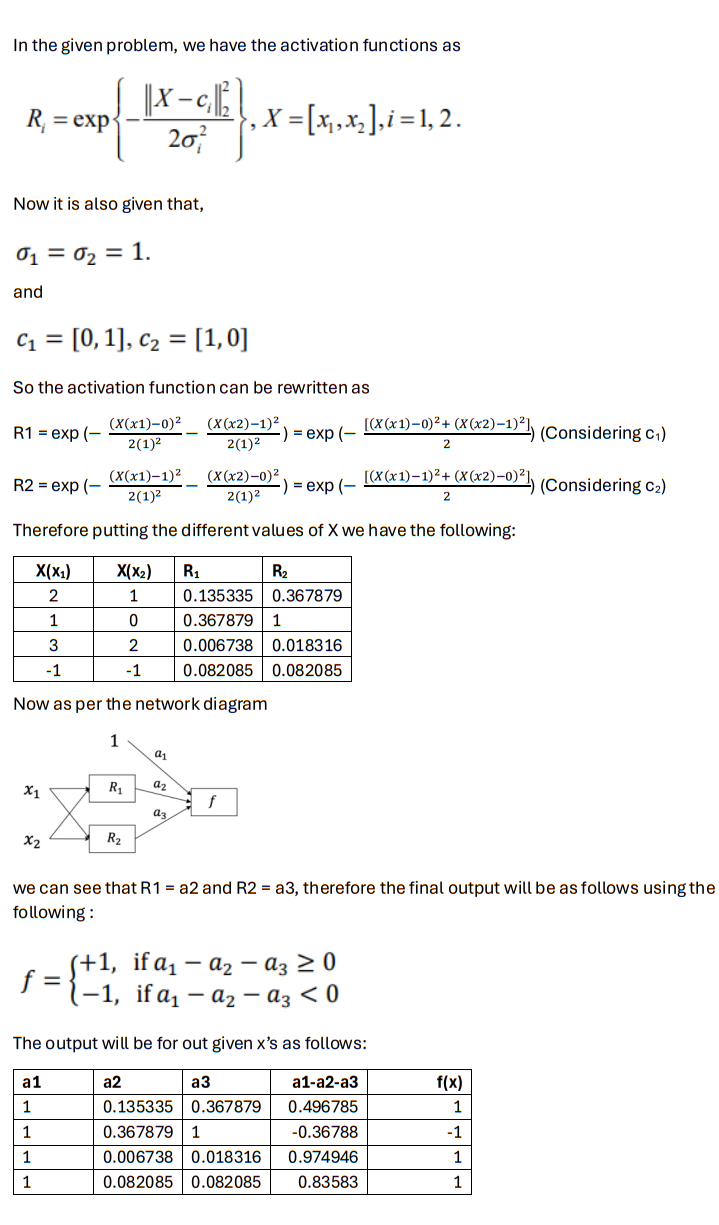

In [4]:
from IPython.display import Image
Image(filename='media\hw4_p4.png') 

### Problem 5

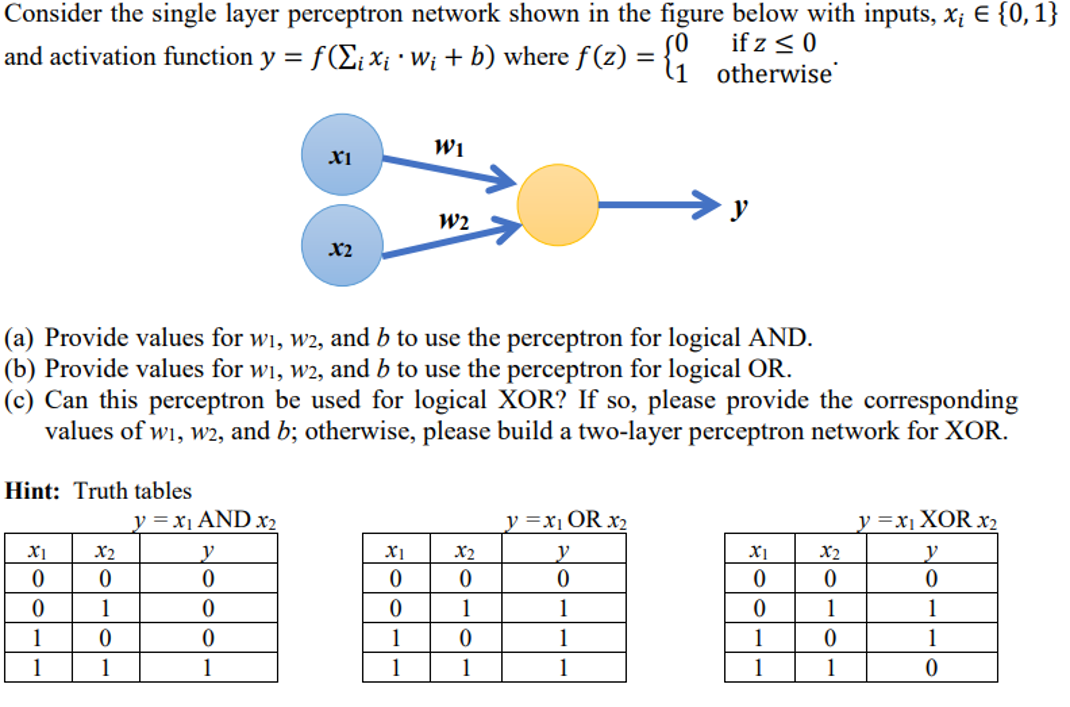

In [7]:
Image(filename='media\hw4_p5_q.png') 

#### Solution

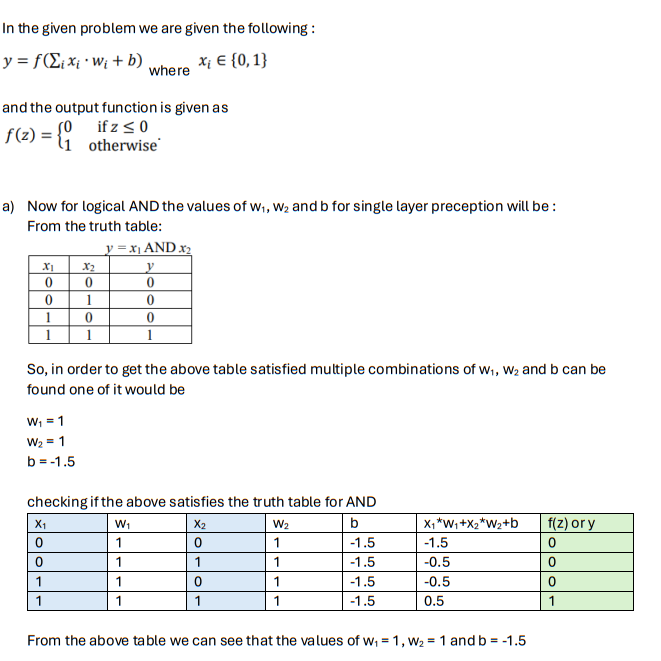

In [16]:
# Section a
Image(filename='media\hw4_p5_ans_a.png') 

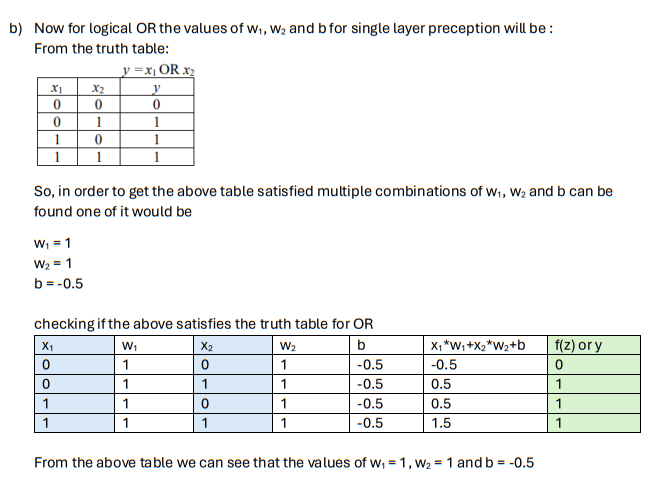

In [17]:
# Section b
Image(filename='media\hw4_p5_ans_b.png') 

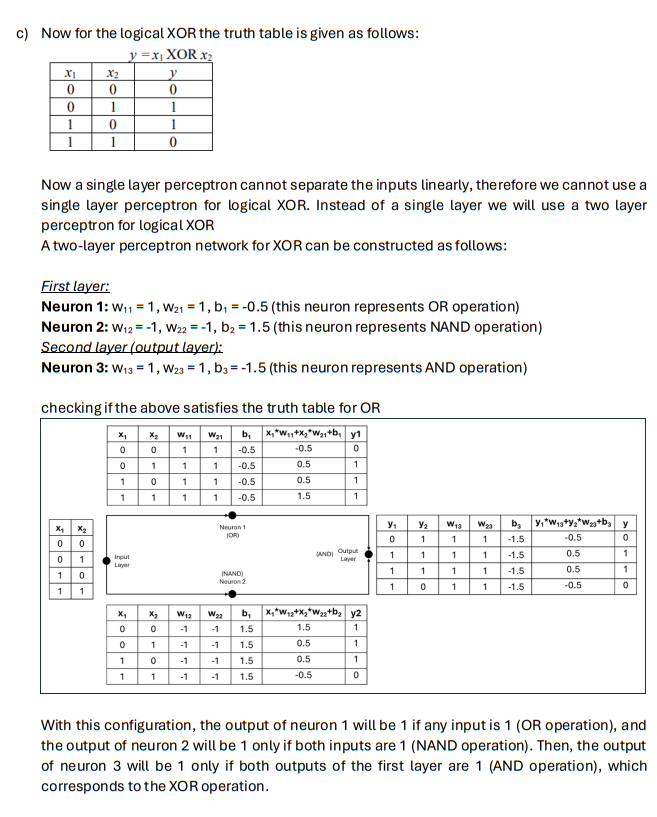

In [19]:
# Section c
Image(filename='media\hw4_p5_ans_c.png') 